# Bike Sharing Count Prediction 

Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to show the figures in the jupyter notebook itself
%matplotlib inline

In [3]:
import datetime

In [4]:
train_bikes = pd.read_csv("train_bikes.csv")
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train_bikes.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train_bikes['datetime'] = pd.to_datetime(train_bikes['datetime'])
train_bikes.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
train_bikes['Hour'] = train_bikes['datetime'].dt.hour

In [8]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [9]:
train_bikes['Month'] = train_bikes['datetime'].dt.month

In [10]:
train_bikes['weekday'] = train_bikes['datetime'].dt.dayofweek

In [11]:
train_bikes['Year'] = train_bikes['datetime'].dt.year

In [12]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,weekday,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011


In [13]:
for col in train_bikes.columns[1:]:
     print(f'the unique values of {col} are {train_bikes[col].unique()}')

the unique values of season are [1 2 3 4]
the unique values of holiday are [0 1]
the unique values of workingday are [0 1]
the unique values of weather are [1 2 3 4]
the unique values of temp are [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
the unique values of atemp are [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
the unique values of humidity are [ 81  80  75  

or can be done as

In [14]:
print('the unique values of season are {}'.format(train_bikes['season'].unique()))
print('the unique values of holiday are {}'.format(train_bikes['holiday'].unique()))
print('the unique values of workingday are {}'.format(train_bikes['workingday'].unique()))
print('the unique values of weather are {}'.format(train_bikes['weather'].unique()))
print('the unique values of windspeed are {}'.format(train_bikes['windspeed'].unique()))
print('the unique values of casual are {}'.format(train_bikes['casual'].unique()))
print('the unique values of Hour are {}'.format(train_bikes['Hour'].unique()))
print('the unique values of weekday are {}'.format(train_bikes['weekday'].unique()))
print('the unique values of Year are {}'.format(train_bikes['Year'].unique()))

the unique values of season are [1 2 3 4]
the unique values of holiday are [0 1]
the unique values of workingday are [0 1]
the unique values of weather are [1 2 3 4]
the unique values of windspeed are [ 0.      6.0032 16.9979 19.0012 19.9995 12.998  15.0013  8.9981 11.0014
 22.0028 30.0026 23.9994 27.9993 26.0027  7.0015 32.9975 36.9974 31.0009
 35.0008 39.0007 43.9989 40.9973 51.9987 46.0022 50.0021 43.0006 56.9969
 47.9988]
the unique values of casual are [  3   8   5   0   2   1  12  26  29  47  35  40  41  15   9   6  11   4
   7  16  20  19  10  13  14  18  17  21  33  23  22  28  48  52  42  24
  30  27  32  58  62  51  25  31  59  45  73  55  68  34  38 102  84  39
  36  43  46  60  80  83  74  37  70  81 100  99  54  88  97 144 149 124
  98  50  72  57  71  67  95  90 126 174 168 170 175 138  92  56 111  89
  69 139 166 219 240 147 148  78  53  63  79 114  94  85 128  93 121 156
 135 103  44  49  64  91 119 167 181 179 161 143  75  66 109 123 113  65
  86  82 132 129 196 142 12

In [15]:
bike_X_columns = [x for x in train_bikes.columns if x not in ['datetime','count']]
bike_X_columns

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'Hour',
 'Month',
 'weekday',
 'Year']

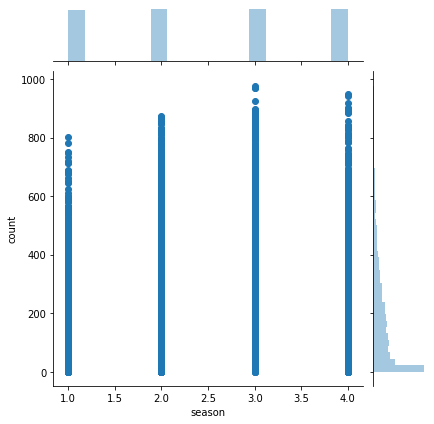

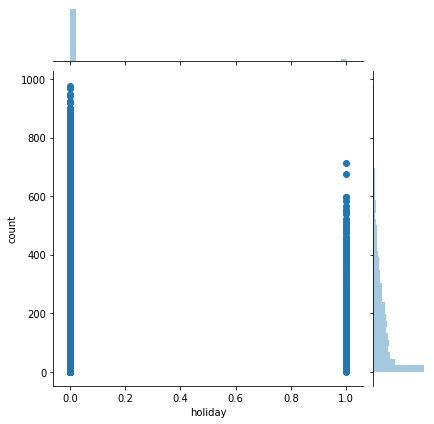

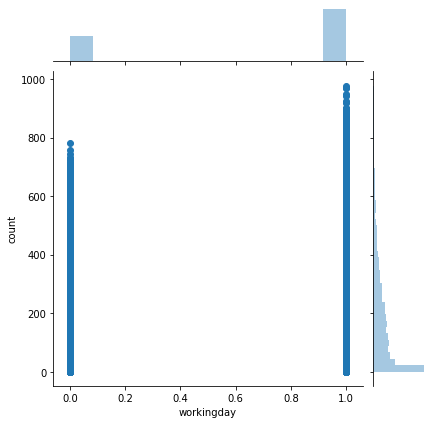

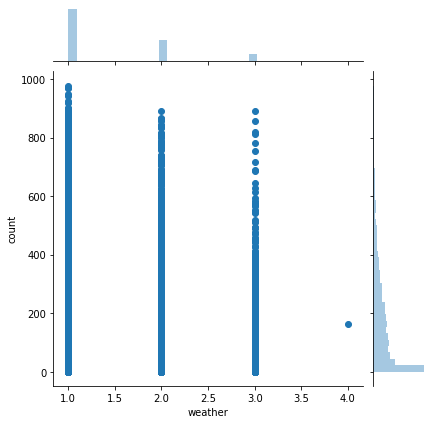

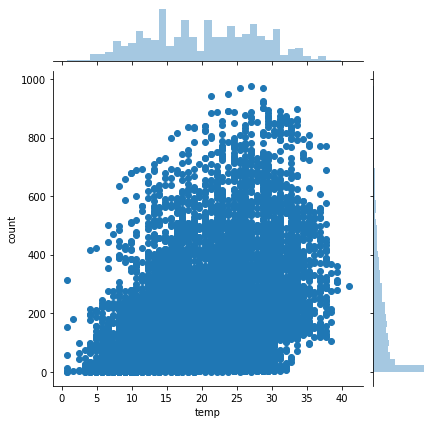

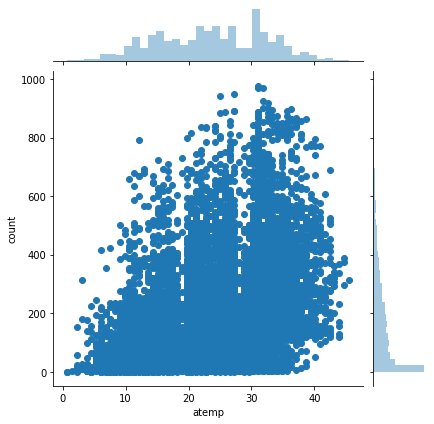

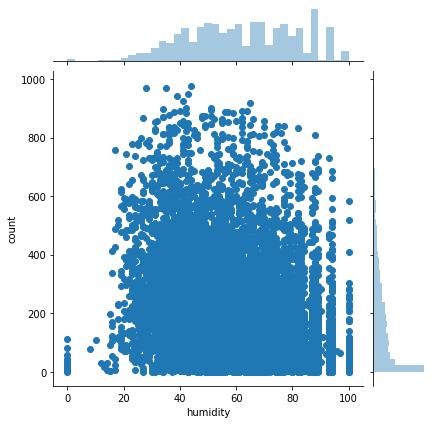

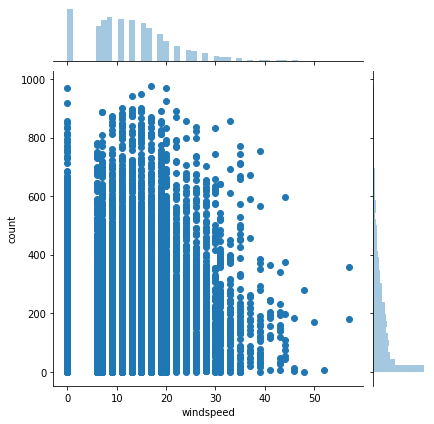

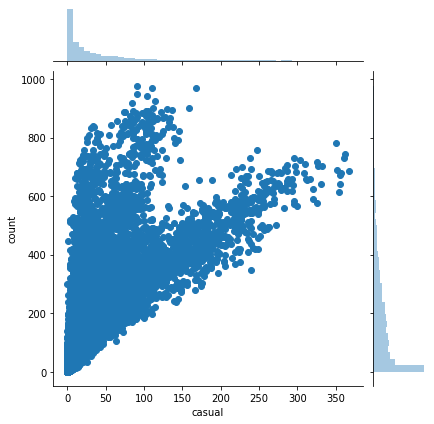

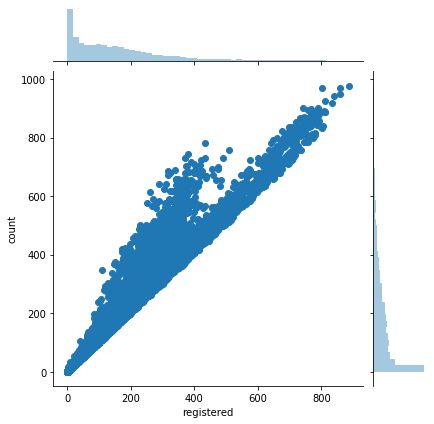

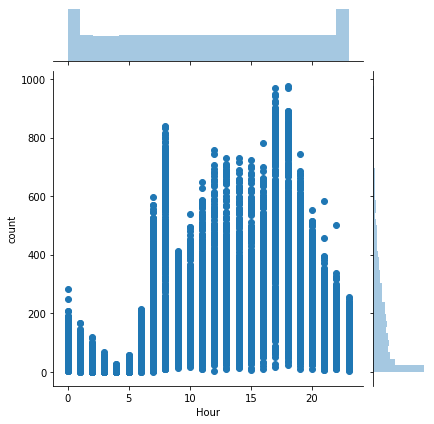

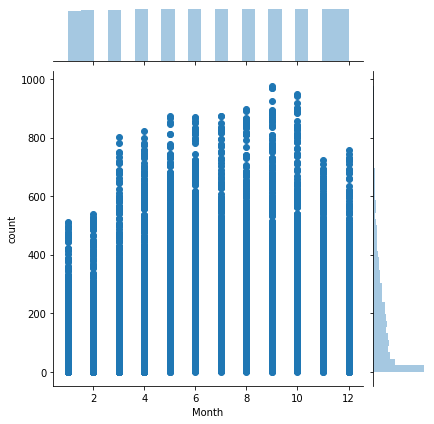

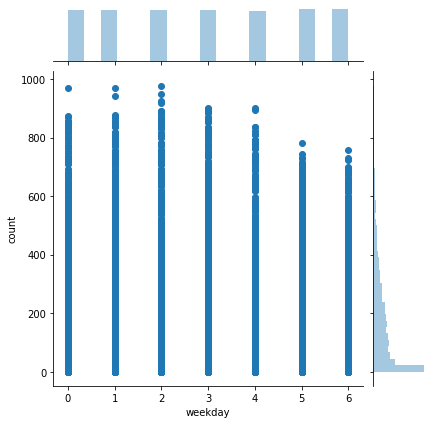

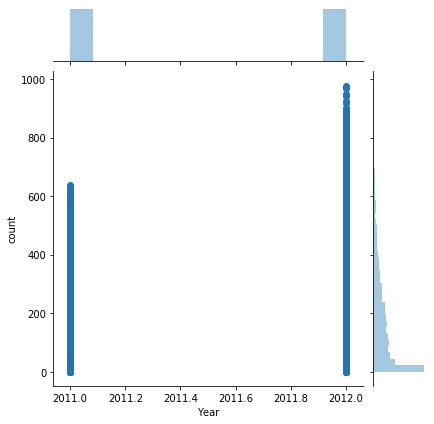

In [16]:
for i in bike_X_columns:
    sns.jointplot(train_bikes[i], train_bikes['count'])

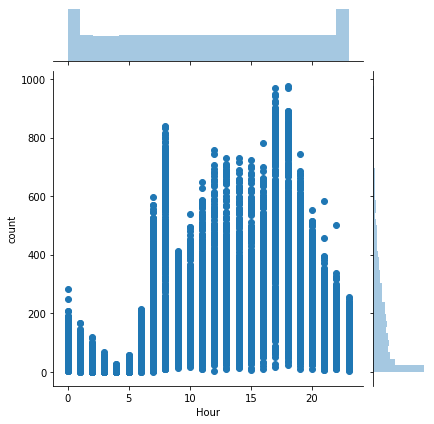

In [17]:
sns.jointplot(train_bikes['Hour'], train_bikes['count'])

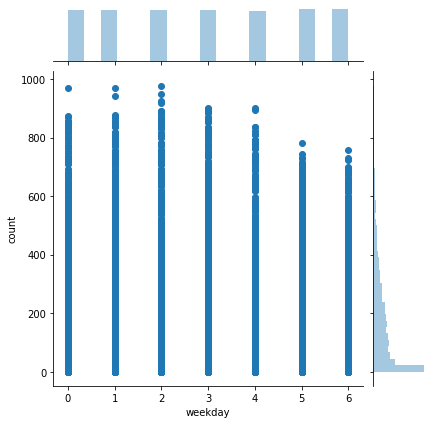

In [18]:
sns.jointplot(train_bikes['weekday'], train_bikes['count'])

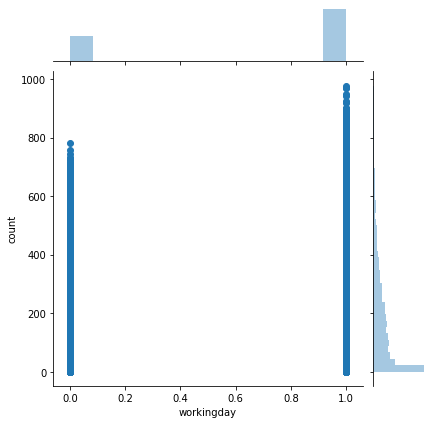

In [19]:
sns.jointplot(train_bikes['workingday'], train_bikes['count'])

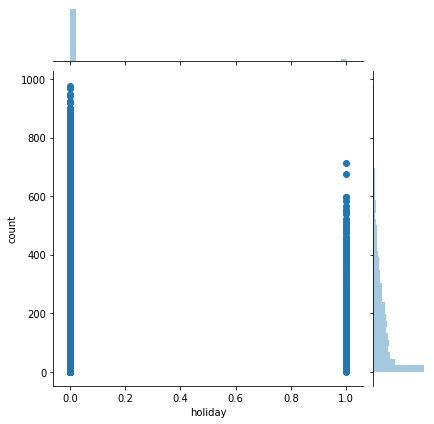

In [20]:
sns.jointplot(train_bikes['holiday'], train_bikes['count'])

# Finding the categorical columns and their unique values

In [21]:
def determine_type_of_feature(dataframe):
    feature_types = []
    categorical_features = []
    continuous_features = []
    n_unique_threshold = 24
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        example_value = unique_values[0]
            
        if (isinstance(example_value,str)) or (len(unique_values)<=n_unique_threshold):
            feature_types.append('categorical')
            categorical_features.append(column)
        else:
            feature_types.append('continuous')
            continuous_features.append(column)
    return feature_types,categorical_features, continuous_features

In [22]:
feature_types = determine_type_of_feature(train_bikes)
i = 0
for col in train_bikes.columns:
    print(f'{col}: {feature_types[0][i]}')
    i+= 1
    
categorical_features = feature_types[1]    
print(f'list of categorical features: {categorical_features}')    

datetime: continuous
season: categorical
holiday: categorical
workingday: categorical
weather: categorical
temp: continuous
atemp: continuous
humidity: continuous
windspeed: continuous
casual: continuous
registered: continuous
count: continuous
Hour: categorical
Month: categorical
weekday: categorical
Year: categorical
list of categorical features: ['season', 'holiday', 'workingday', 'weather', 'Hour', 'Month', 'weekday', 'Year']


# Plotting CatPlot for the categorical features

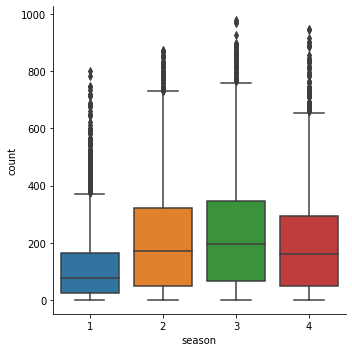

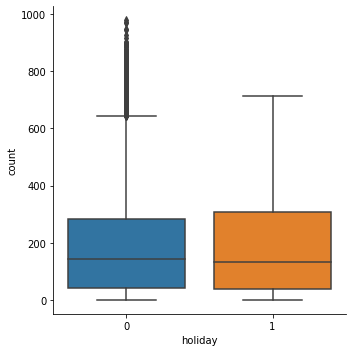

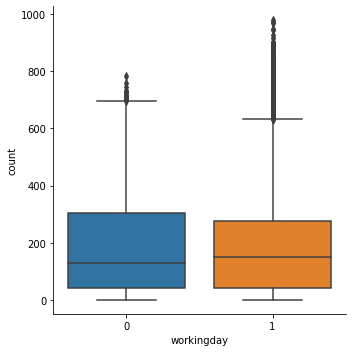

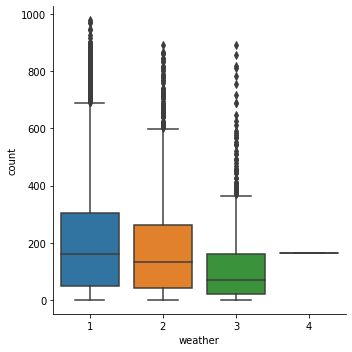

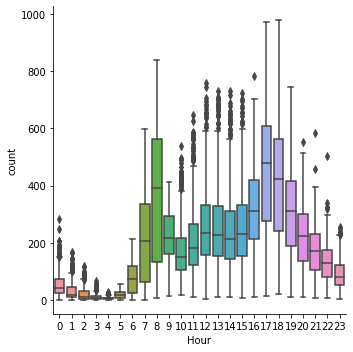

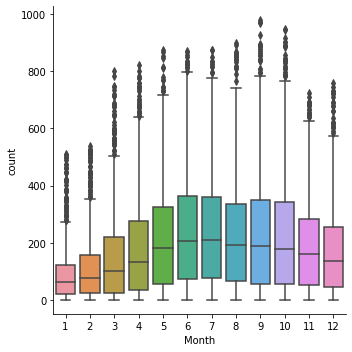

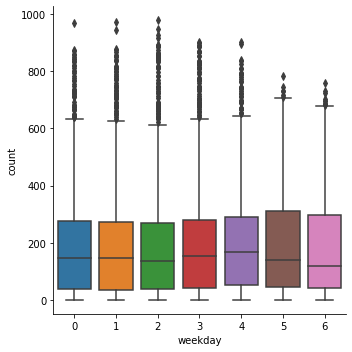

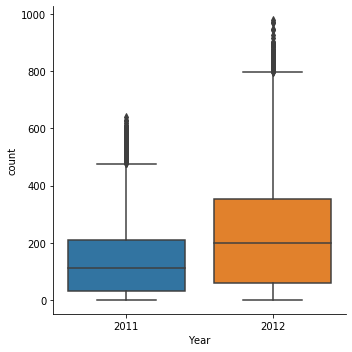

In [202]:
for i in categorical_features:
    sns.catplot(x = i, y = 'count', kind = 'box', data = train_bikes, dodge = False)

# Checking for Null Values

In [24]:
for i in bike_X_columns:
    print('The sum of null values of {} is {}'.format(i,train_bikes[i].isnull().sum()))

The sum of null values of season is 0
The sum of null values of holiday is 0
The sum of null values of workingday is 0
The sum of null values of weather is 0
The sum of null values of temp is 0
The sum of null values of atemp is 0
The sum of null values of humidity is 0
The sum of null values of windspeed is 0
The sum of null values of casual is 0
The sum of null values of registered is 0
The sum of null values of Hour is 0
The sum of null values of Month is 0
The sum of null values of weekday is 0
The sum of null values of Year is 0


In [25]:
train_bikes.groupby(['Year','Hour'])['count'].sum()

Year  Hour
2011  0         9889
      1         6064
      2         4267
      3         2122
      4         1130
      5         3252
      6        13057
      7        35664
      8        60149
      9        37339
      10       29934
      11       35543
      12       43819
      13       43774
      14       41607
      15       42796
      16       54015
      17       80679
      18       73426
      19       53812
      20       39518
      21       30579
      22       23674
      23       15870
2012  0        15199
      1         9308
      2         5992
      3         2969
      4         1702
      5         5683
      6        21641
      7        61304
      8       104911
      9        63571
      10       49733
      11       60314
      12       73149
      13       73777
      14       69403
      15       73164
      16       90251
      17      133078
      18      123046
      19       89955
      20       64686
      21       48478
      22       37237
  

# Plotting by year and count of bike rentals by hour of the day 

In [26]:
train_bikes.groupby(['Year','Hour'])['count'].sum().unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,
2011,9889,6064,4267,2122,1130,3252,13057,35664,60149,37339,...,41607,42796,54015,80679,73426,53812,39518,30579,23674,15870
2012,15199,9308,5992,2969,1702,5683,21641,61304,104911,63571,...,69403,73164,90251,133078,123046,89955,64686,48478,37237,24946


The above cannot be used to plot so we will have to transpose it

In [29]:
df_hour = train_bikes.groupby(['Year','Hour'])['count'].sum().unstack().T
df_hour = df_hour.reset_index()
df_hour.columns

Index(['Hour', 2011, 2012], dtype='object', name='Year')

See the result of transpose is much better and plottable except all the columns now are indices, so we will have to work on it as below

Playing around it disect the result

In [30]:
for col in df_hour.columns:
    print(col)

Hour
2011
2012


In [31]:
df_hour.columns[0]

'Hour'

with bar plot we can now plot the year wise - hourly count of bikes rented plot

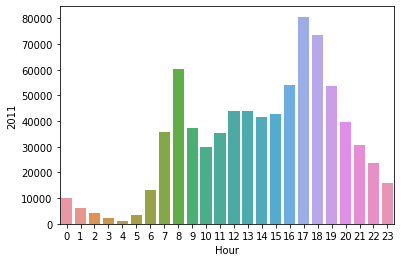

In [32]:
sns.barplot(df_hour.columns[0],df_hour.columns[1],data=df_hour)

In [33]:
df_hour.columns[2]

2012

In [34]:
len(df_hour.columns)

3

In [35]:
for i in range(len(df_hour.columns)):
    print(i)

0
1
2


# converting the plot into function

In [36]:
def plot_by_hour(dataframe):
    df_hour = dataframe.groupby(['Year','Hour'])['count'].sum().unstack().T
    df_hour = df_hour.reset_index()
    for i in df_hour.columns:
        if i!= 'Hour':
            return sns.barplot(df_hour.columns[0],i,data=df_hour)

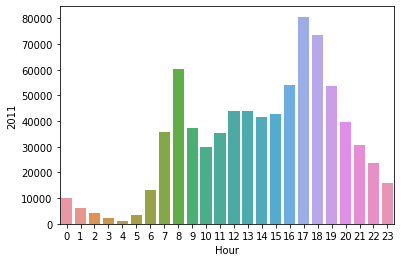

In [37]:
plot_by_hour(train_bikes)

# A better function to plot which is more clear and also has titles

In [38]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour_year(dataframe, year):
    df = dataframe
    if year: 
        df = dataframe[dataframe['Year'] == year]
        by_hour_year = df.groupby(['Hour','workingday'])['count'].sum().unstack()
            
    return by_hour_year.plot(kind='bar', ylim=(0, 80000), figsize=(12,8), width=0.9, title="Year = {}".format(year)) # returning the figure grouped by hour


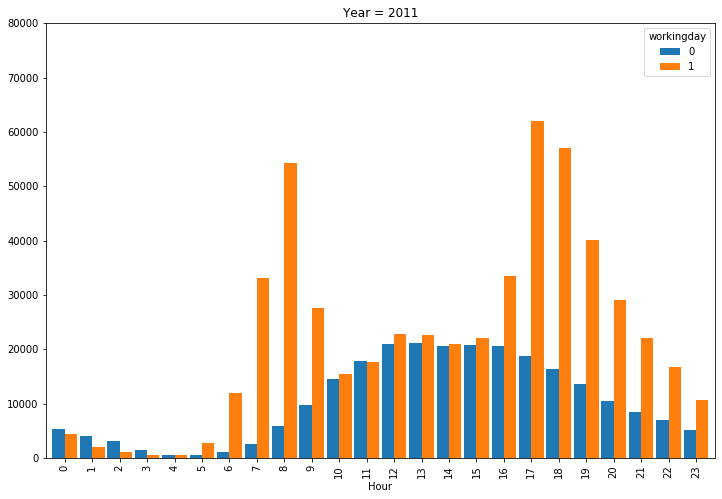

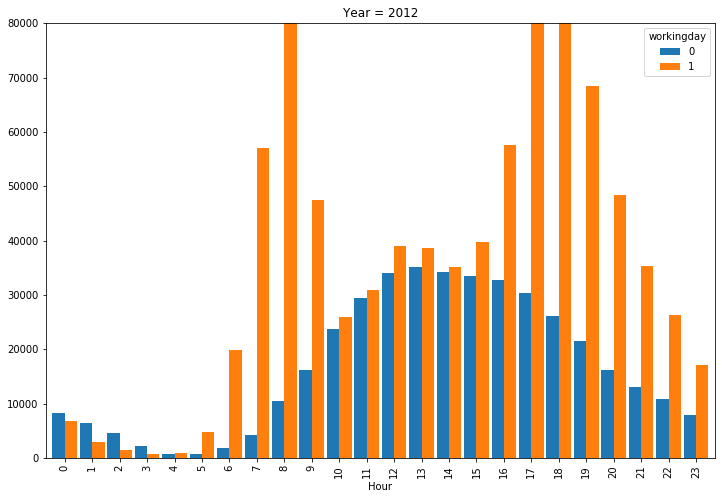

In [39]:
plot_by_hour_year(train_bikes, year=2011)
plot_by_hour_year(train_bikes, year=2012)

# Taking similar approach from above to plot by workday with hourly count for each year

In [40]:
# method for creating the count plot based on hour for a given year 
def plot_by_workday_hour_year(dataframe, year):
    df = dataframe
    if year: 
        df = dataframe[dataframe['Year'] == year ]
        by_workday_hour_year = df.groupby(['workingday','Hour'])['count'].sum().unstack()
        
    
    return by_workday_hour_year.plot(kind='bar', ylim=(0, 80000), figsize=(12,8), width=0.9, title="Year = {}".format(year)) # returning the figure grouped by hour


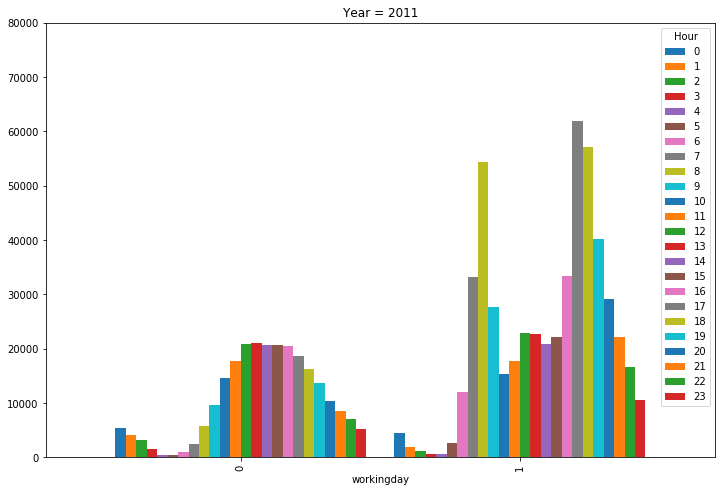

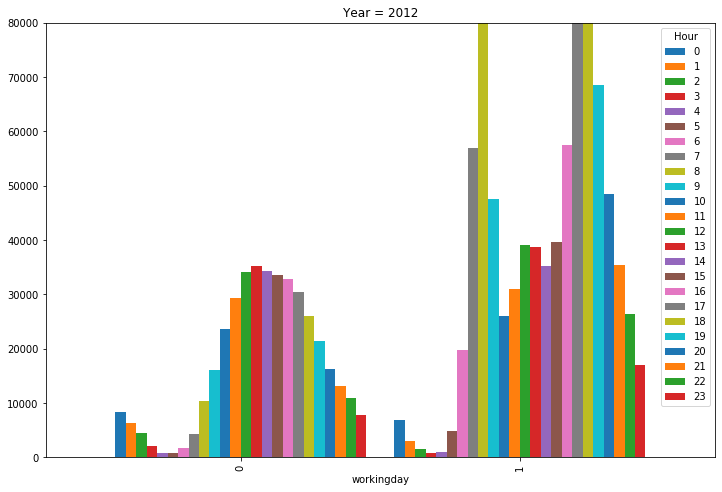

In [41]:
plot_by_workday_hour_year(train_bikes, year=2011)
plot_by_workday_hour_year(train_bikes, year=2012)

# Another way to plot which lays out work day and no work day for each month beside each other

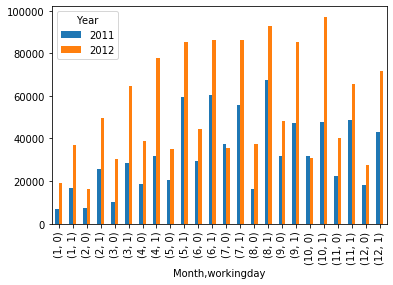

In [42]:
by_year = train_bikes.groupby(['Month','workingday','Year'])['count'].agg('sum').unstack()
by_year.plot(kind='bar')

# Plotting by year - Month/ Hour/ weekday count

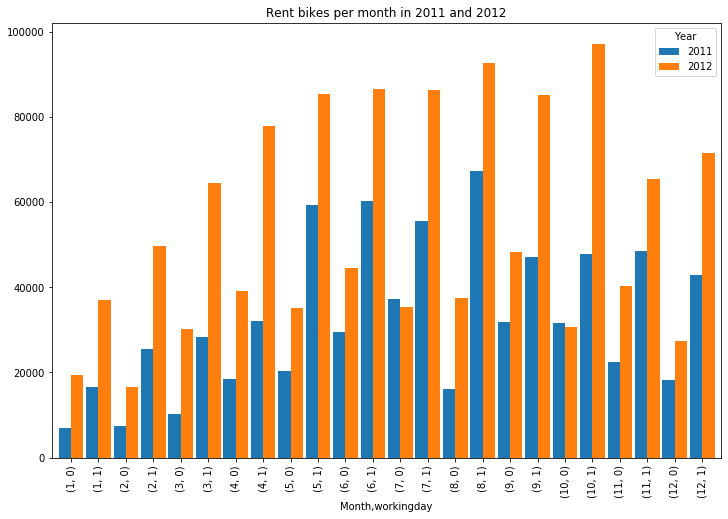

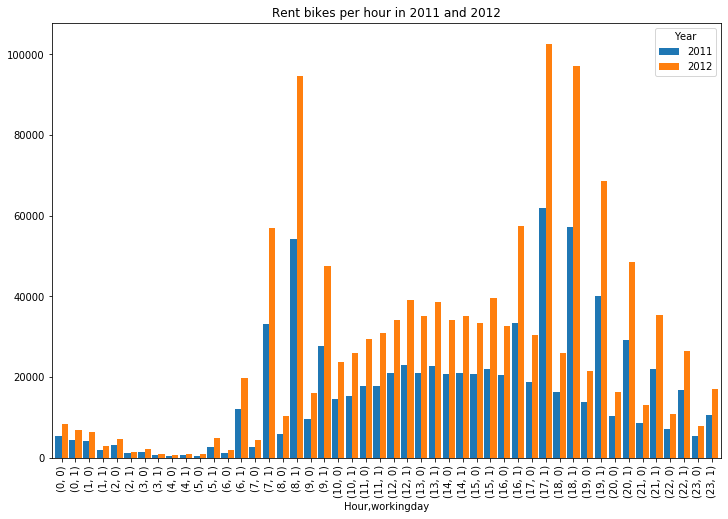

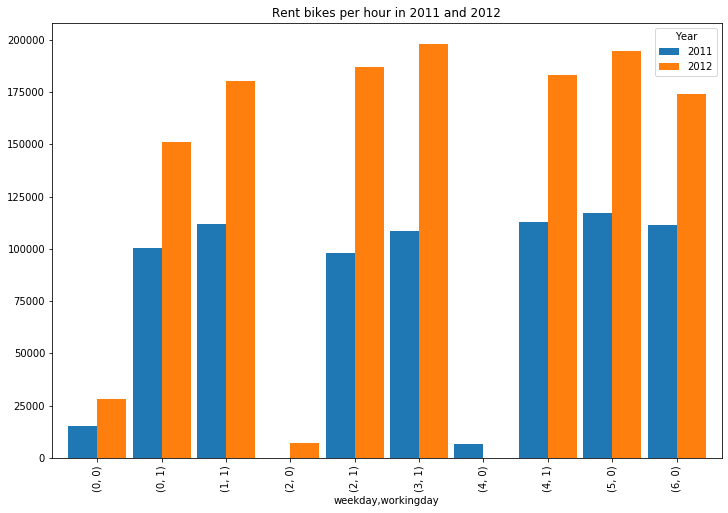

In [44]:
# method for creating the count plot based on year 
# agg_attr is where we pass Month, weekday, hour etc to plot in addition to workingday and year
#in title we pass the title of the plot
def plot_by_year(dataframe, agg_attr, title):
    # extracting the required fields
    df = dataframe.copy()
            
    by_year = df.groupby([agg_attr,'workingday','Year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(12,8), width=0.9, title=title) # returning the figure grouped by year


plot_by_year(train_bikes,'Month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year(train_bikes,'Hour', "Rent bikes per hour in 2011 and 2012") # plotting hours bike rentals based  on year
plot_by_year(train_bikes,'weekday', "Rent bikes per hour in 2011 and 2012") # plotting hours bike rentals based  on year

# Box plot to understand standard deviation

In [45]:
hours = {}
for hour in range(24):
        hours[hour] = train_bikes[ train_bikes.Hour == hour ]['count'].values
hours        

{0: array([ 16,  17,   5,   5,   6,  11,  17,  25,  25,   5,  12,   7,   7,
         14,  28,  39,  17,   3,   8,   2,  12,  13,  39,  39,  15,  10,
         17,  16,  14,  30,  39,  11,  19,  15,  17,  32,  29,   7,   8,
         13,  12,  19,  52,   4,  10,   9,   3,   6,  34,  38,  11,  14,
          8,  23,  29,  76,   6,  32,  39,   6,  22,  15,  20,  25,  31,
         53,  23,  24,  15,  21,  27,  43,  33,  39,  25,  96, 177,  16,
         27,  27,  56,  86, 100,  53,  18,  38,  44,  52, 102,  39,  38,
         31,  23,  29,  34,  42,  68,  93, 113,  29,  20,  41,  47,  69,
        117, 119,  28,  31,  52,  47,  24, 104,  89,  68, 115, 144, 140,
         55,  37,  35,  47, 121, 154,  35,  22,  46,  46,  80, 110, 125,
         51,  51,  29,  29,  43,  17,  54, 133,  80,  30,  35,  37,  46,
         65,  84,  90,  25,  31,  24,  56,  62,  51,  64,  87, 109,  97,
          8,  13,  14,  16, 116, 108,  16,  26,  33,  37,  48, 108, 112,
         37, 130,  47,  16,  27,  43,  40,  67, 

In [48]:
# method to plot a graph for count per hour
def plot_hours(data, message = ''):
    df = train_bikes.copy()
       
    hours = {}
    for hour in range(24):
        hours[hour] = train_bikes[ train_bikes.Hour == hour ]['count'].values
       

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    
    axis.set_ylim([1, 1100])
 

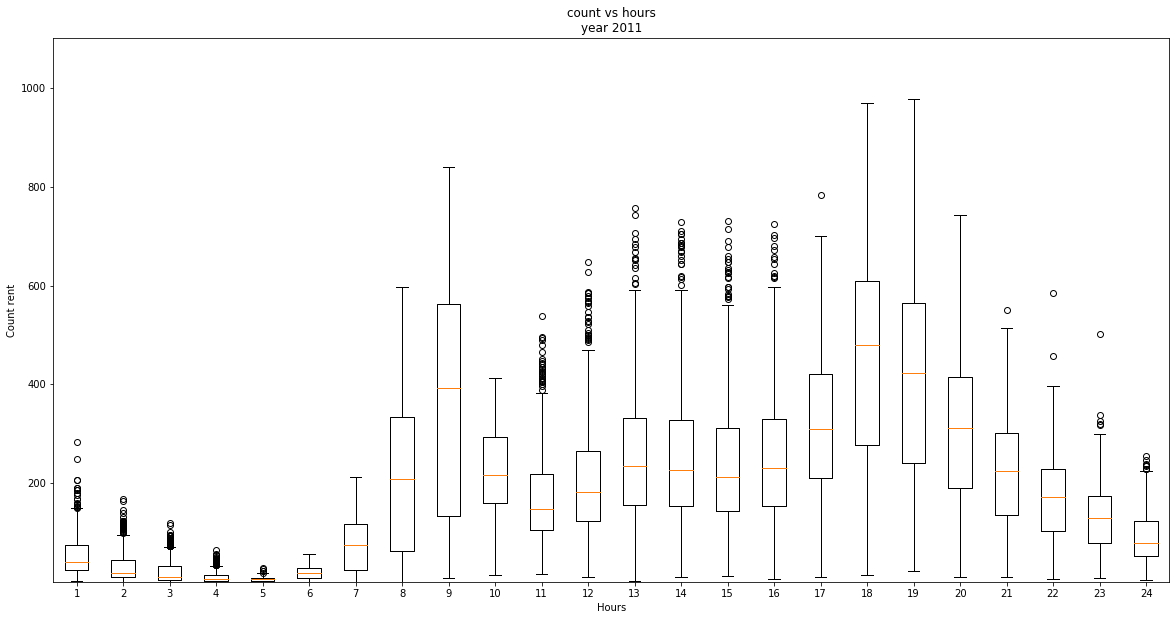

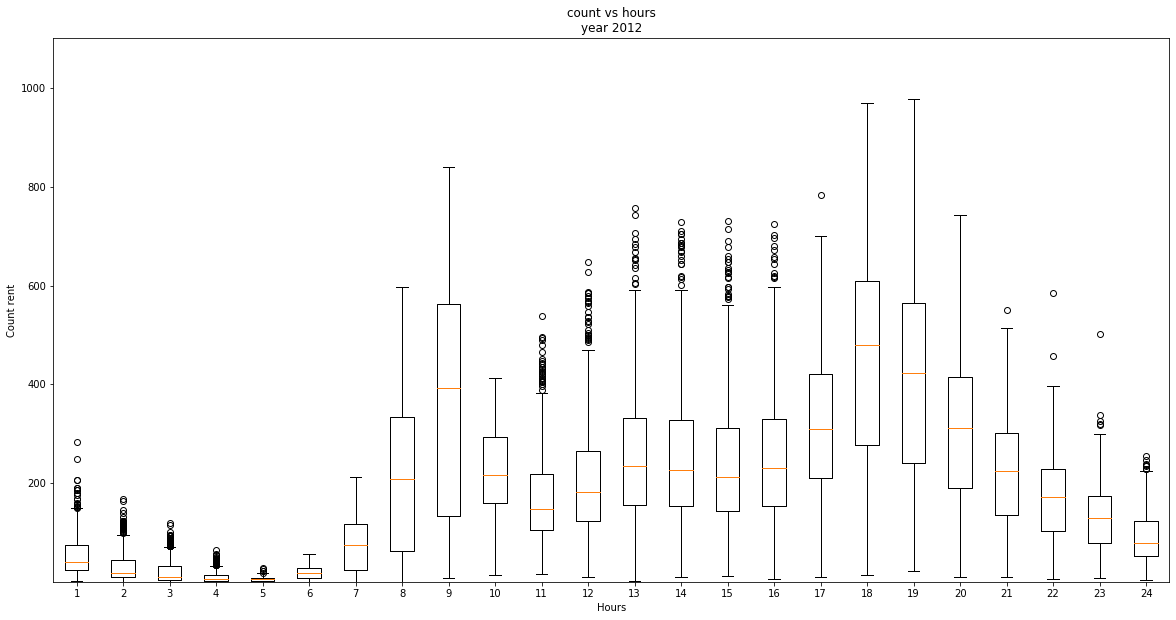

In [49]:
plot_hours( train_bikes[train_bikes.Year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( train_bikes[train_bikes.Year == 2012], 'year 2012') # box plot for hourly count for the mentioned year

# same plot without the function

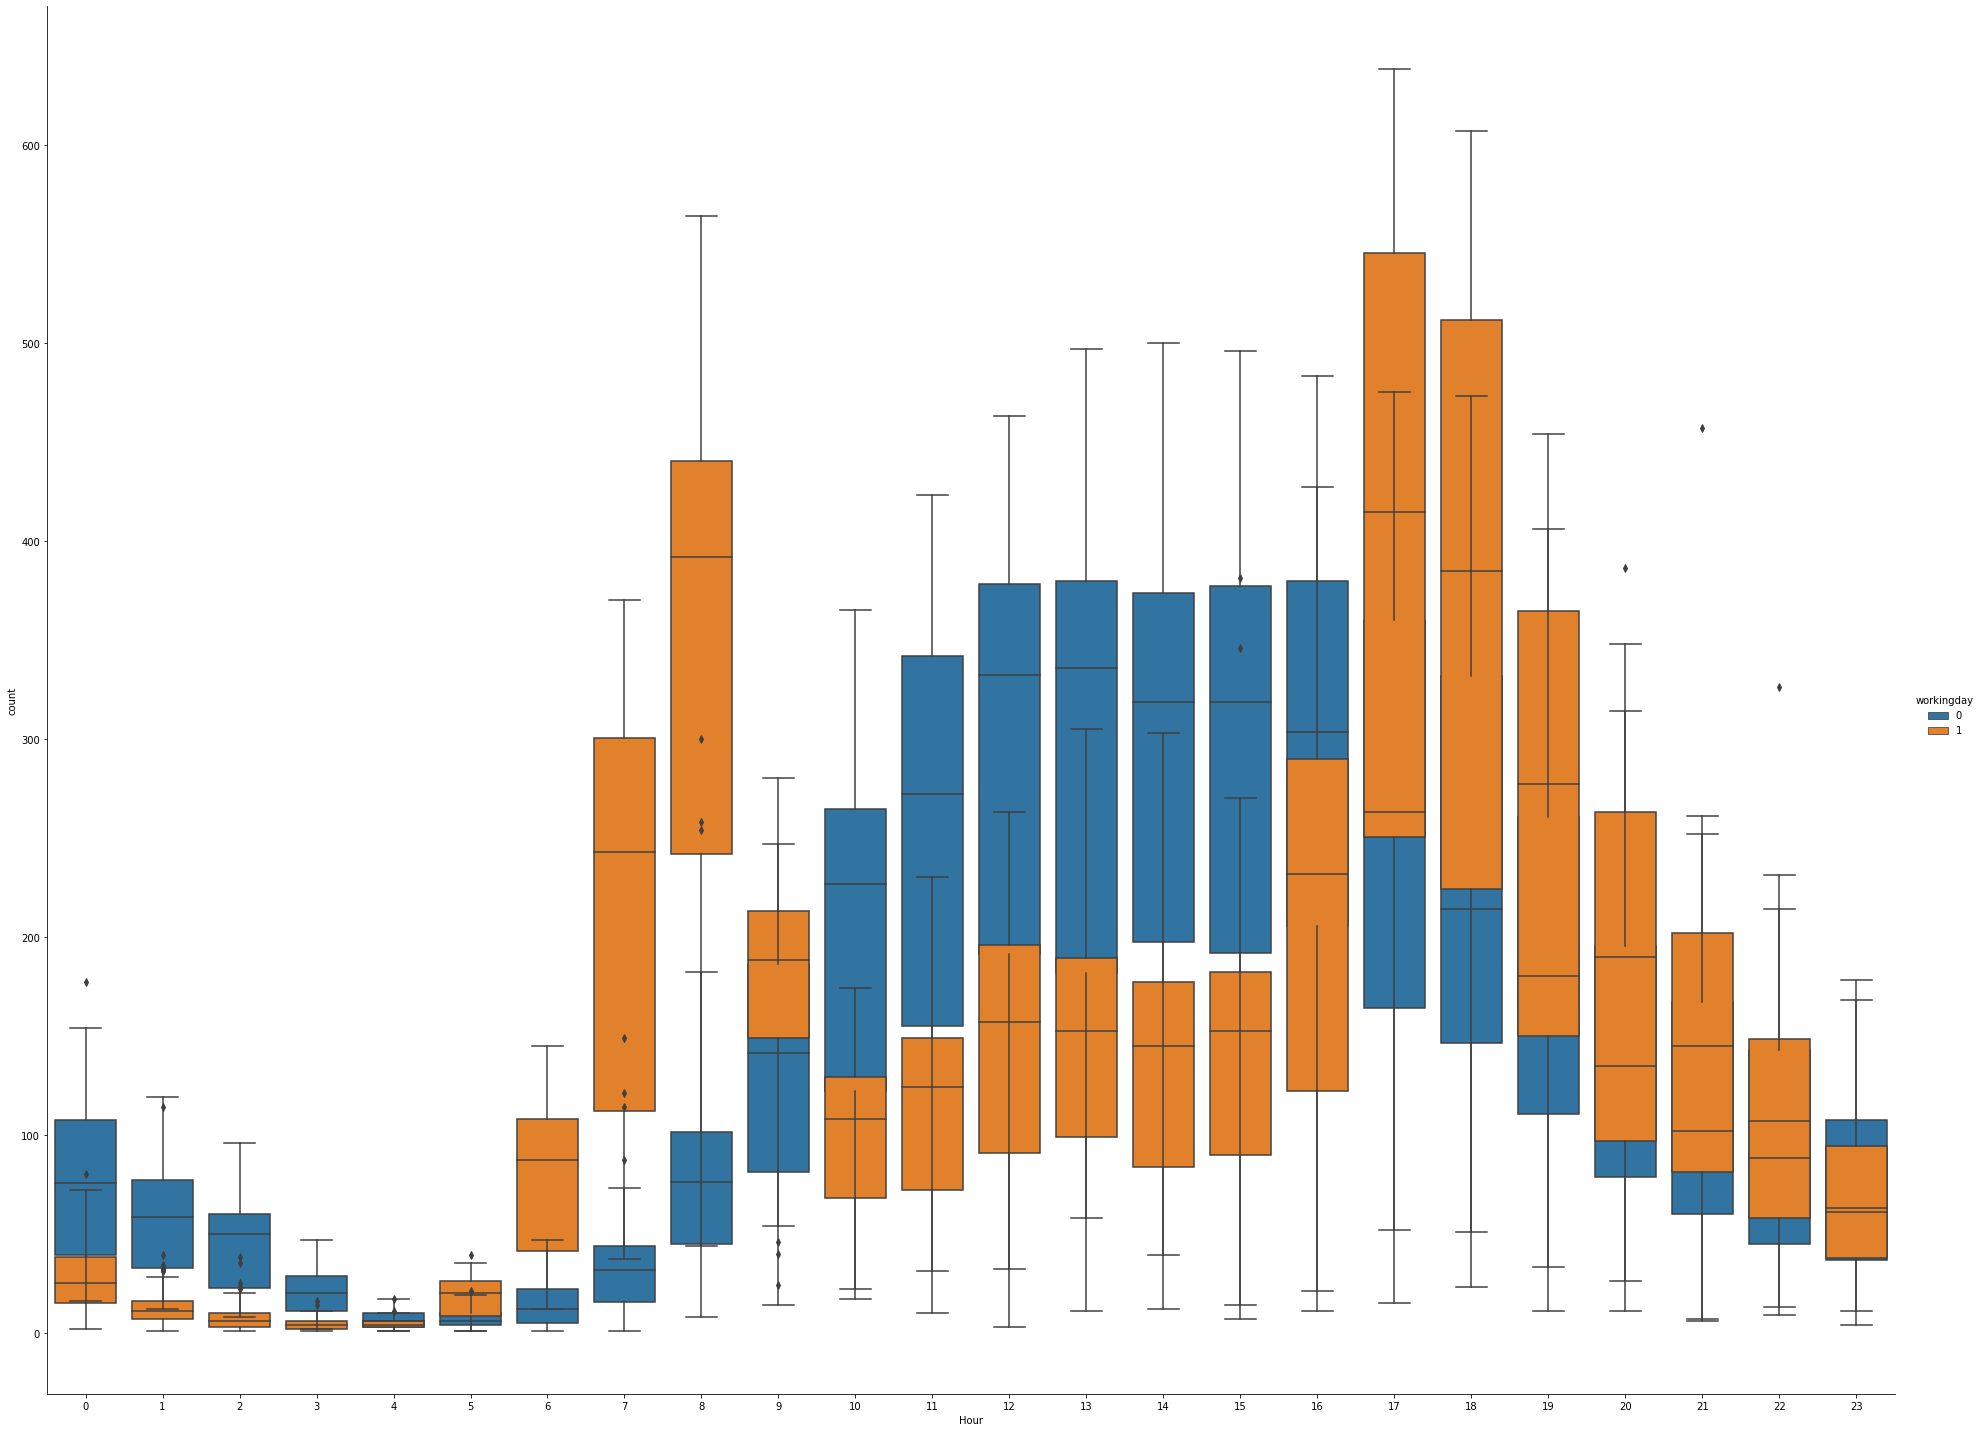

In [51]:

sns.catplot(x = 'Hour', y = 'count', kind = 'box', data = train_bikes[train_bikes.Year == 2011], hue="workingday",height = 20, aspect=20/15,dodge = False)

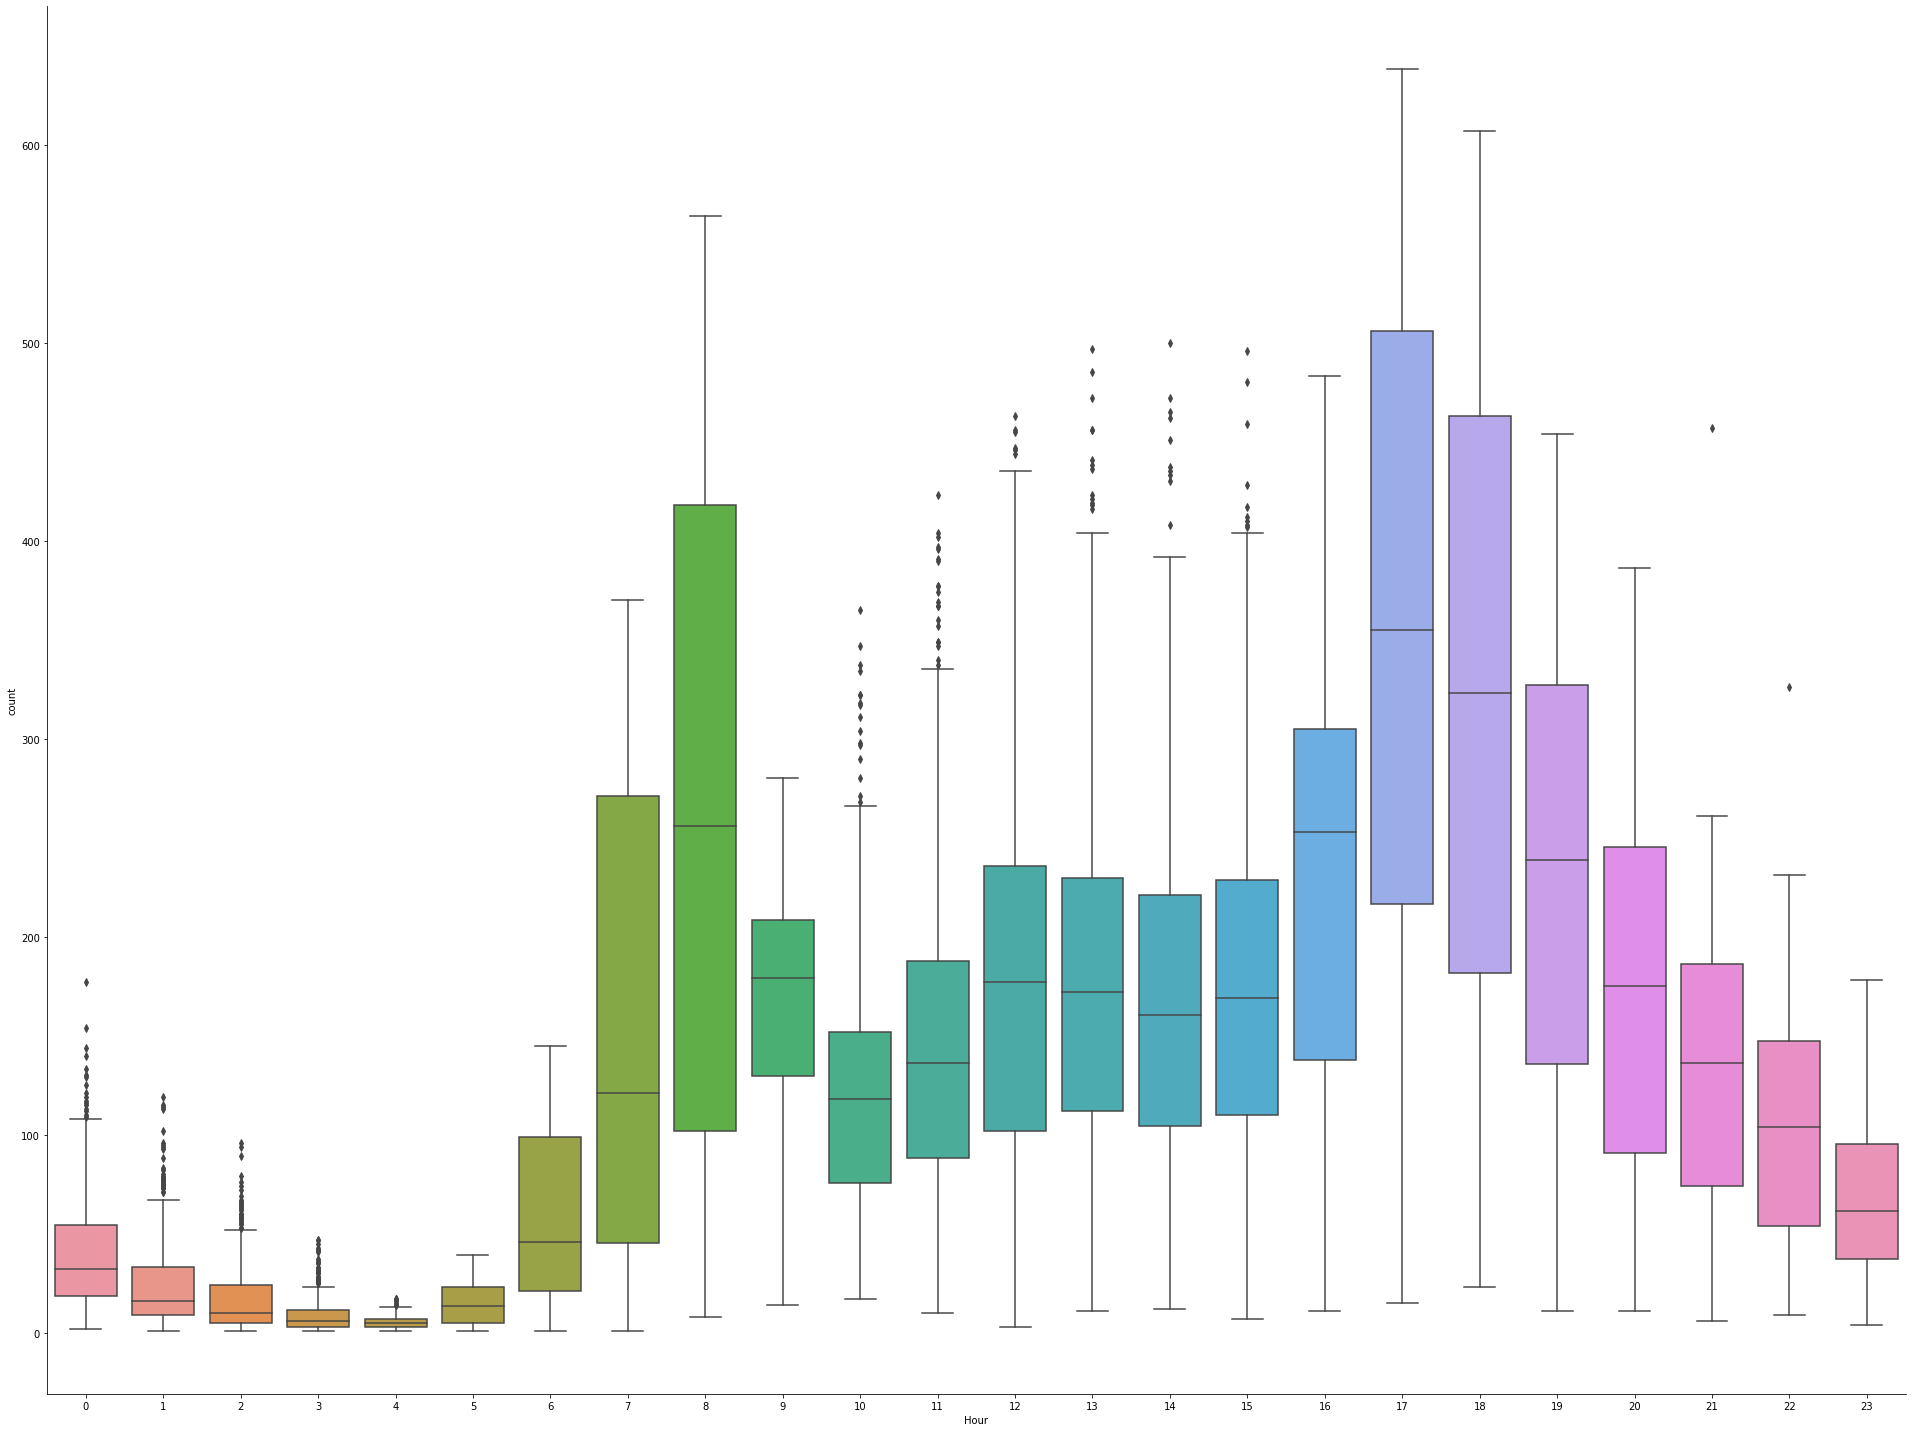

In [52]:

sns.catplot(x = 'Hour', y = 'count', kind = 'box', data = train_bikes[train_bikes.Year == 2011],height = 20, aspect=20/15,dodge = False)

# converting the hourly spread if 1--24 into just 4 categories and converting the dataframe column

In [53]:
def cat_to_num(x):
    if 0<=x<6:
        return 1
    elif 0<=x<12:
        return 2
    elif 0<=x<18:
        return 3
    else:
        return 4

In [54]:
train_bikes['Hour_cat'] = train_bikes['Hour'].apply(lambda x: cat_to_num(x))
train_bikes['Hour_cat']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: Hour_cat, Length: 10886, dtype: int64

In [55]:
train_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,weekday,Year,Hour_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5,2011,1


def preprocess(data):
    df = data.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['Hour'] = df['datetime'].dt.hour
    df['Year'] = df['datetime'].dt.year
    df['weekday'] = df['datetime'].dt.dayofweek
    df['month'] = df['datetime'].dt.month
    df['Hour_cat'] = df['Hour'].apply(lambda x: cat_to_num(x))
    df = df.drop(['datetime','Hour'], axis=1)
    return df

train = pd.read_csv("train_bikes.csv")
train.head()

Train = preprocess(train)
Train.head()

test = pd.read_csv("test_bikes.csv")
Test = preprocess(test)
Test.head()

# Plotting with the new Hour_cat column that we created above

In [61]:
train_bikes.groupby(["temp"]).agg("mean")['count']

temp
0.82      77.714286
1.64      91.500000
2.46      43.000000
3.28      19.272727
4.10      50.272727
4.92      58.416667
5.74      53.233645
6.56      68.109589
7.38      67.754717
8.20      81.995633
9.02      73.616935
9.84      86.442177
10.66     92.560241
11.48    111.066298
12.30    120.002597
13.12    148.547753
13.94    145.053269
14.76    152.957173
15.58    179.682353
16.40    170.217500
17.22    182.609551
18.04    160.878049
18.86    159.692118
19.68    185.058824
20.50    204.672783
21.32    196.480663
22.14    184.717122
22.96    212.392405
23.78    235.650246
24.60    237.182051
25.42    222.062035
26.24    232.403974
27.06    211.025381
27.88    203.433036
28.70    257.679157
29.52    277.691218
30.34    303.193980
31.16    352.801653
31.98    318.683673
32.80    355.623762
33.62    348.323077
34.44    340.225000
35.26    342.934211
36.08    362.869565
36.90    318.717391
37.72    332.176471
38.54    238.857143
39.36    317.833333
41.00    294.000000
Name: count, dt

In [62]:
train_bikes.groupby(["Hour_cat"]).agg("mean")['count']

Hour_cat
1     25.177720
2    209.948718
3    299.529240
4    228.518640
Name: count, dtype: float64

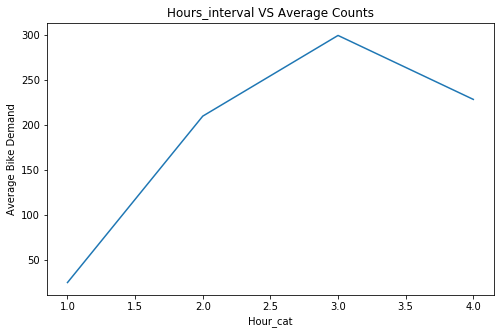

In [63]:
avg_hour_count = train_bikes.groupby(["Hour_cat"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('Hours_interval VS Average Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average Bike Demand')
avg_hour_count['count'].plot()

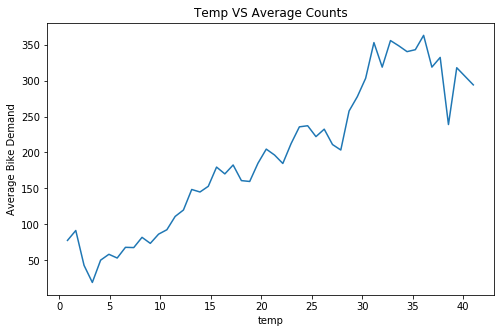

In [64]:
avg_temp_count = train_bikes.groupby(["temp"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('Temp VS Average Counts')
axes.set_xlabel('temp in Hours')
axes.set_ylabel('Average Bike Demand')
avg_temp_count['count'].plot()

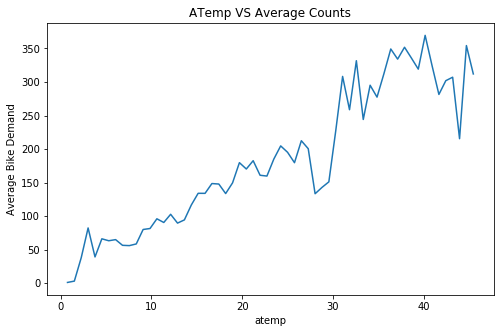

In [65]:
avg_atemp_count = train_bikes.groupby(["atemp"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('ATemp VS Average Counts')
axes.set_xlabel('ATemp in Hours')
axes.set_ylabel('Average Bike Demand')
avg_atemp_count['count'].plot()

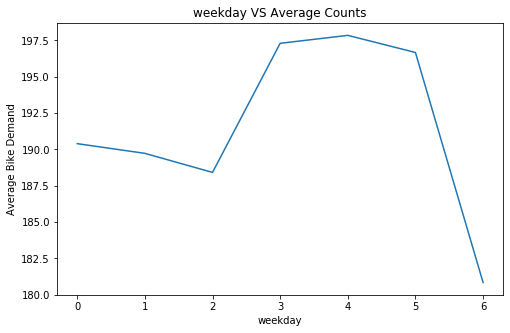

In [66]:
avg_weekday_count = train_bikes.groupby(["weekday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('weekday VS Average Counts')
axes.set_xlabel('weekday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_weekday_count['count'].plot()

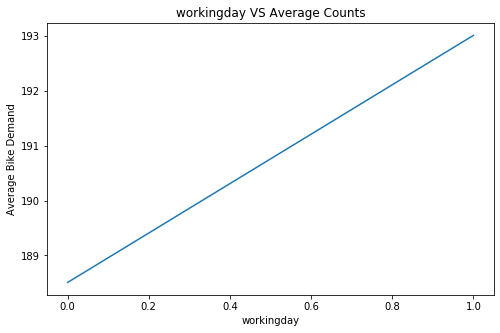

In [67]:
avg_workingday_count = train_bikes.groupby(["workingday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('workingday VS Average Counts')
axes.set_xlabel('workingday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_workingday_count['count'].plot()

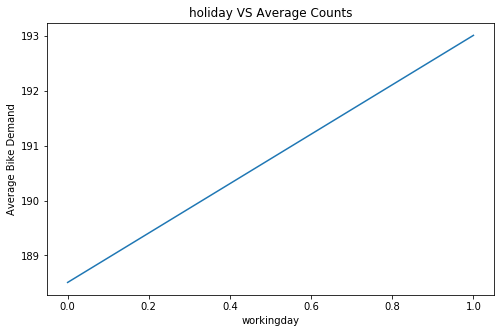

In [68]:
avg_holiday_count = train_bikes.groupby(["holiday"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('holiday VS Average Counts')
axes.set_xlabel('holiday in Hours')
axes.set_ylabel('Average Bike Demand')
avg_workingday_count['count'].plot()

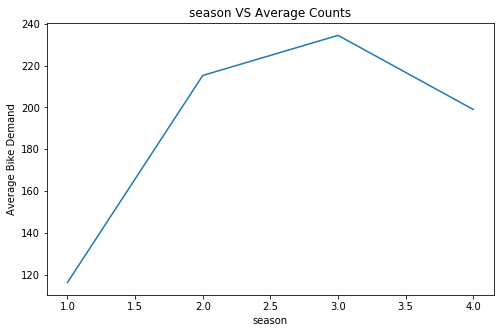

In [69]:
avg_season_count = train_bikes.groupby(["season"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('season VS Average Counts')
axes.set_xlabel('season in Hours')
axes.set_ylabel('Average Bike Demand')
avg_season_count['count'].plot()

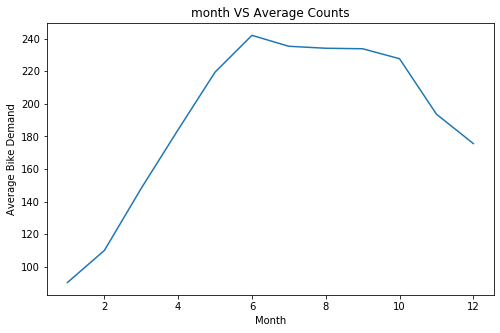

In [71]:
avg_month_count = train_bikes.groupby(["Month"]).agg("mean")
figure,axes = plt.subplots(figsize = (8, 5))
plt.title('month VS Average Counts')
axes.set_xlabel('month in Hours')
axes.set_ylabel('Average Bike Demand')
avg_month_count['count'].plot()

# Finding Correlation through heatmap

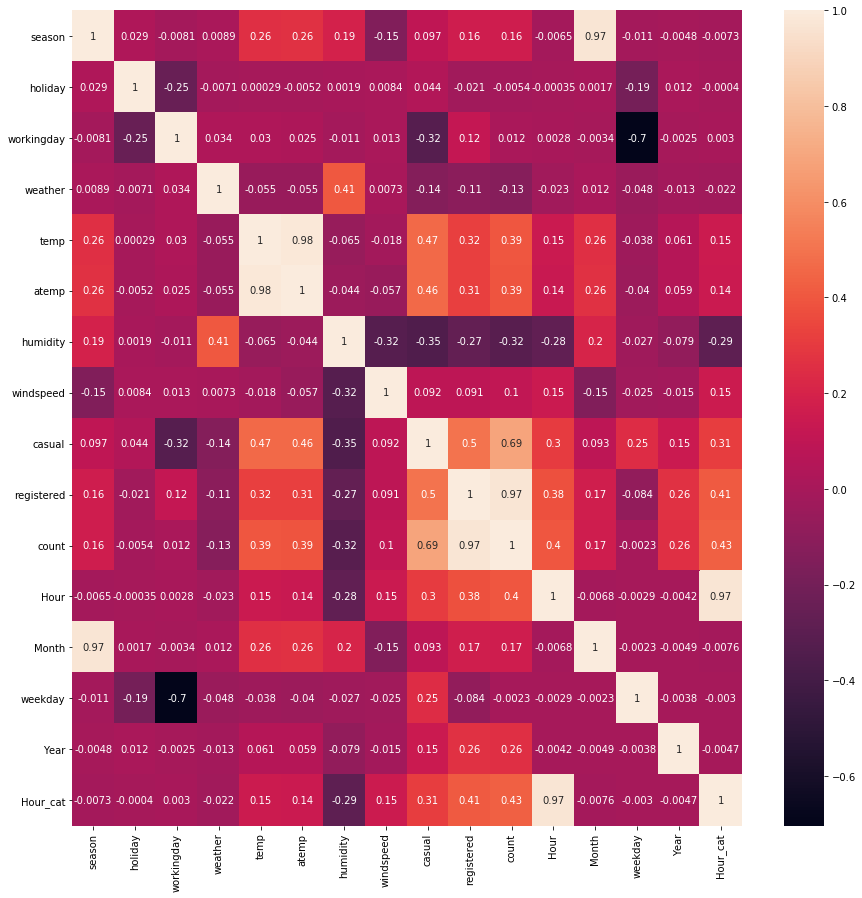

In [75]:
#corr = Train.corr()
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 15
#sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns)

corr = train_bikes.corr()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
sns.heatmap(corr, xticklabels = corr.columns, annot = True, yticklabels = corr.columns)

In [76]:
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Hour,Month,weekday,Year,Hour_cat
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524,-0.010553,-0.004797,-0.007340
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731,-0.191832,0.012021,-0.000402
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394,-0.704267,-0.002482,0.002975
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144,-0.047692,-0.012548,-0.022127
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589,-0.038466,0.061226,0.148428
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173,-0.040235,0.058540,0.143400
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537,-0.026507,-0.078606,-0.285974
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192,-0.024804,-0.015221,0.149285
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722,0.246959,0.145241,0.308472
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451,-0.084427,0.264265,0.412465


In [77]:
corr.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'Hour',
       'Month', 'weekday', 'Year', 'Hour_cat'],
      dtype='object')

In [81]:
corr.columns[0]

'season'

In [79]:
len(corr.columns)

16

# The below features filtered have high correlations with count

In [84]:
filtered_features = []
for i in range(len(corr)):
    for j in range(len(corr)):
        if corr.columns[j] == 'count':
            temp = j
            if abs(corr.iloc[i,temp])>=0.3:  
                         filtered_features.append(corr.columns[i])
filtered_features 

['temp',
 'atemp',
 'humidity',
 'casual',
 'registered',
 'count',
 'Hour',
 'Hour_cat']

In [87]:
train_bikes_filtered = train_bikes[filtered_features]
train_bikes_filtered.head(2)

,temp,atemp,humidity,casual,registered,count,Hour,Hour_cat
0,9.84,14.395,81,3,13,16,0,1
1,9.02,13.635,80,8,32,40,1,1


# Finding VIF

In [90]:
import statsmodels.api as smf
from scipy import stats
for i in range(0, len(filtered_features)):
    y = train_bikes_filtered.loc[:, train_bikes_filtered.columns == filtered_features[i]]
    x = train_bikes_filtered.loc[:, train_bikes_filtered.columns != filtered_features[i]]
    model = smf.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            filtered_features[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            filtered_features[i], vif)
        )


R Square value of temp column is 1.0 keeping all other columns as features
Variance Inflation Factor of temp column is 262.0 

R Square value of atemp column is 1.0 keeping all other columns as features
Variance Inflation Factor of atemp column is 292.42 

R Square value of humidity column is 0.87 keeping all other columns as features
Variance Inflation Factor of humidity column is 7.98 

R Square value of casual column is 1.0 keeping all other columns as features
Variance Inflation Factor of casual column is inf 

R Square value of registered column is 1.0 keeping all other columns as features
Variance Inflation Factor of registered column is inf 

R Square value of count column is 1.0 keeping all other columns as features
Variance Inflation Factor of count column is inf 

R Square value of Hour column is 0.98 keeping all other columns as features
Variance Inflation Factor of Hour column is 54.57 

R Square value of Hour_cat column is 0.99 keeping all other columns as features
Varianc

C:\Users\ayonh\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


Conclusion: lets not use count, atemp, and Hour column based on the vif and the coorelation matrix
count will be used in y

# Final X and Y

In [92]:
final_selection_features = ['temp','humidity','casual','registered', 'Hour_cat']
X = train_bikes[final_selection_features]
y = train_bikes['count']

# since this is a regression problemn we will see the distribution of the final features

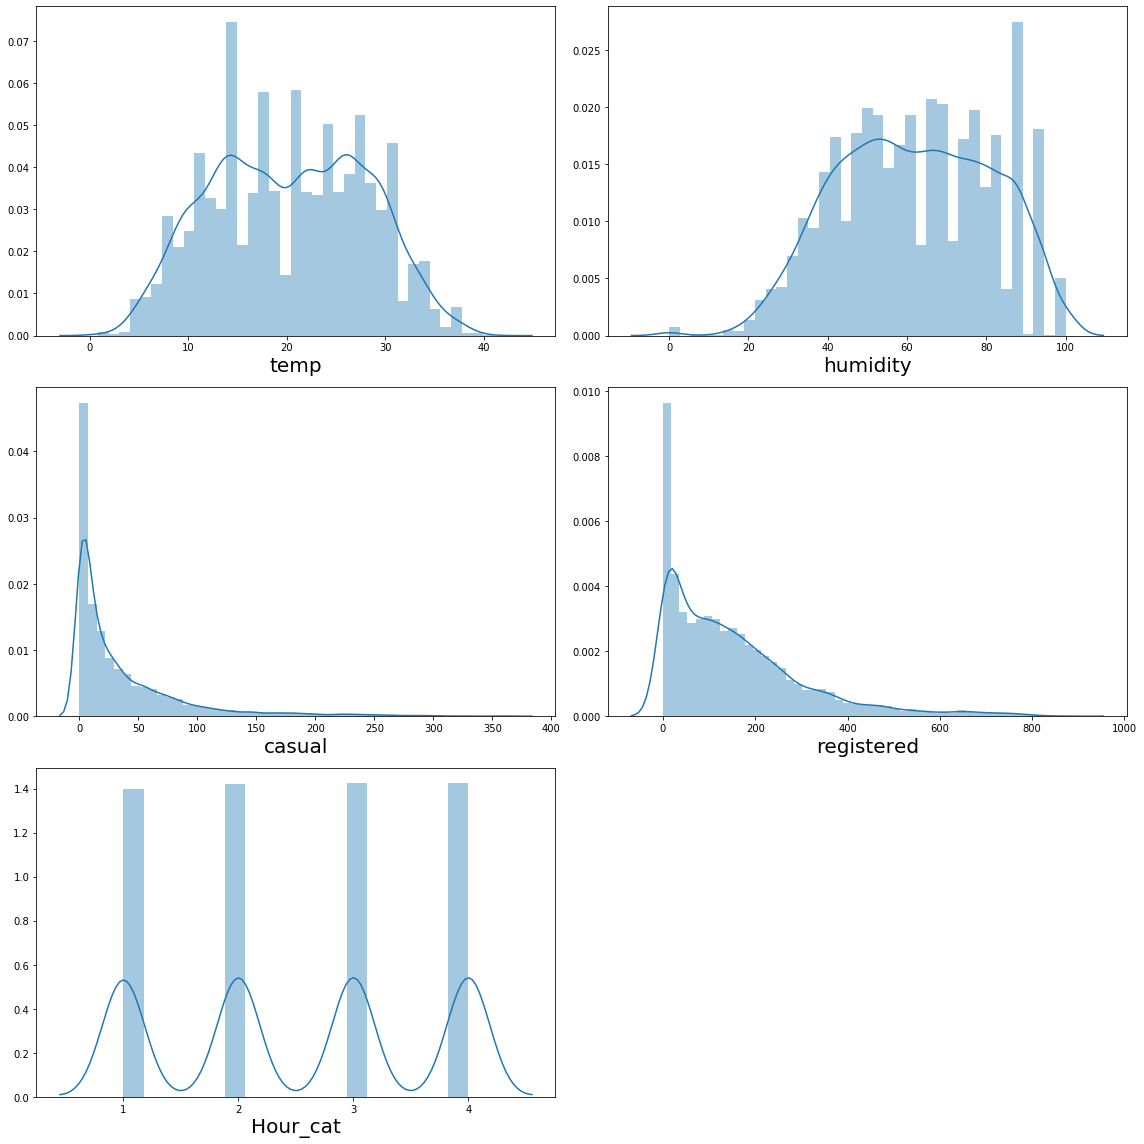

In [93]:
plt.figure(figsize=(16,16), facecolor='white')
plotnumber = 1

for column in X.columns:
    if plotnumber<=6 :
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

except for casual and registered all the normally distributed

# checking the preliminary statistical measures

In [94]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='count ~ temp + humidity + casual + registered + Hour_cat', data=train_bikes).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.965e+33
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:48:56   Log-Likelihood:             3.0339e+05
No. Observations:               10886   AIC:                        -6.068e+05
Df Residuals:                   10880   BIC:                        -6.067e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.132e-13   9.67e-15     22.054      0.000    1.94e-13    2.32e-13
temp       -8.882e-15   2.69e-16    -32.977      0.000   -9.41e-15   -8.35e-15
humidity    1.998e-15   1.04e-16     19.139      0.000    1.79e-15     2.2e-15
casual         1.0000   4.76e-17    2.1e+16      0.000       1.000       1.000
registered     1.0000   1.48e-17   6.75e+16      0.000       1.000       1.000
Hour_cat    2.132e-14   1.84e-15     11.577      0.000    1.77e-14    2.49e-14
==============================================================================
Omnibus:                     1781.235   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3258.865
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                       4.698   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Score Metrics explanation:
    
    https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-log-error
    https://towardsdatascience.com/metrics-to-understand-regression-models-in-plain-english-part-1-c902b2f4156f  
    https://www.dataquest.io/blog/understanding-regression-error-metrics/

# Building a function to evaluate scoring metrics

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [118]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
def model_scorer(models,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    simple_modeling(X_train, X_test, y_train, y_test)
    Model_name = []
    R2 = []
    adjusted_R2 = []
    mean_mse = []
    RMSLE = []
    for i in models:
        Model_name.append(i)
        models[i].fit(X_train, y_train)
        y_pred = models[i].predict(X_test)
        R2.append(r2_score(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        n = X_test.shape[0]
        p = X_test.shape[1]
        ad_R2 = 1-(1-r2)*(n-1)/(n-p-1)
        adjusted_R2.append(ad_R2)
        mse = np.sqrt(1/len(y_test)*np.sum((y_pred - y_test)**2))
        mean_mse.append(mse)
        rmsle = mean_squared_log_error(y_test, y_pred)
        RMSLE.append(rmsle)
    performance_df = pd.DataFrame({'Model Name':Model_name,'Rsquared':R2,'Adjusted R2':adjusted_R2, 'MSE':mean_mse, 'RMSLE':rmsle })
    return performance_df   

In [120]:
models = {'dummy-median': DummyRegressor(strategy='median'), 'dummy-mean':DummyRegressor(strategy='mean'),'linear_regression':LinearRegression(),'random-forest':RandomForestRegressor()}
model_scorer(models,X,y)

,Model Name,Rsquared,Adjusted R2,MSE,RMSLE
0,dummy-median,-0.087909,-0.089577,1.879619e+02,0.000147
1,dummy-mean,-0.000513,-0.002047,1.802541e+02,0.000147
2,linear_regression,1.000000,1.000000,1.538705e-13,0.000147
3,random-forest,0.999725,0.999724,2.990743e+00,0.000147
